# Assignment 5 
> Dominik Huffield <br>
CS 533 <br>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
articles = pd.DataFrame.from_records(
    ((f.parent.name, f.name, f.read_text(encoding='latin1'))
     for f in Path('bbc').glob('*/*.txt')),
    columns=['category', 'file', 'text']
)

In [3]:
articles.groupby('category')['file'].count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: file, dtype: int64

**The distribution of each categorty represented numerically**

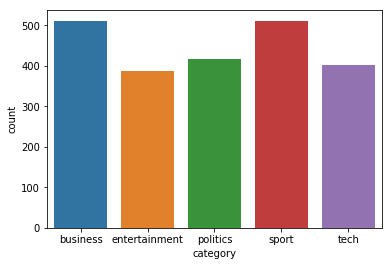

In [4]:
sns.countplot(x=articles['category'])

**The distribution of each categorty represented graphically**

In [5]:
category_dict = {'business':0, 'entertainment':1, 'politics':2, 'sport':3, 'tech':4}
articles['category_id'] = articles['category'].map(category_dict)
articles.head()

,category,file,text,category_id
0,business,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,0
1,business,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,0
2,business,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,0
3,business,004.txt,High fuel prices hit BA's profits\n\nBritish A...,0
4,business,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,0


In [6]:
X = articles['text']
y = articles['category_id']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Splitting into train and test sets having 20% sample test size

In [8]:
count_vect = CountVectorizer(stop_words='english')
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

pd.DataFrame(X_train_count.toarray(), columns=count_vect.get_feature_names()).head()

,00,000,0001,000bn,000m,000s,000th,001st,004,0051,...,zones,zoom,zooms,zooropa,zorro,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
tfidf_vect = CountVectorizer(stop_words='english')
X_train_tfi = tfidf_vect.fit_transform(X_train)
X_test_tfi = tfidf_vect.transform(X_test)

pd.DataFrame(X_train_tfi.toarray(), columns=tfidf_vect.get_feature_names()).head()

,00,000,0001,000bn,000m,000s,000th,001st,004,0051,...,zones,zoom,zooms,zooropa,zorro,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Part 2: Classification

>Taining a model using Naive Bayes using Count Vectorization as data

In [10]:
nb_mod = MultinomialNB()
%time nb_mod.fit(X_train_count, y_train)

CPU times: user 14 ms, sys: 5.08 ms, total: 19.1 ms
Wall time: 15.4 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
y_pred_nb = nb_mod.predict(X_train_count)
metrics.accuracy_score(y_train, y_pred_nb)

0.9960674157303371

In [12]:
y_pred_nb = nb_mod.predict(X_test_count)
metrics.accuracy_score(y_test, y_pred_nb)

0.9865168539325843

>Taining a model using KNeighborsClassifier using TfidfVectorization as data

In [13]:
kn_mod = KNeighborsClassifier(n_neighbors=5)
%time kn_mod.fit(X_train_tfi, y_train)

CPU times: user 14.5 ms, sys: 1.57 ms, total: 16.1 ms
Wall time: 3.53 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
y_pred_kn = kn_mod.predict(X_train_tfi)
metrics.accuracy_score(y_train, y_pred_kn)

0.7415730337078652

In [15]:
y_pred_kn = kn_mod.predict(X_test_tfi)
metrics.accuracy_score(y_test, y_pred_kn)

0.6404494382022472

### Part 3: Clustering

In [16]:
# v = pd.DataFrame(X_train_tfi, index=X_train_tfi)
pd.DataFrame(X_train_tfi.toarray()).head()

,0,1,2,3,4,5,6,7,8,9,...,26740,26741,26742,26743,26744,26745,26746,26747,26748,26749
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
kmeans = KMeans(n_clusters=5)
%time kmeans.fit(X_train_tfi, y_train)

CPU times: user 2min 49s, sys: 721 ms, total: 2min 49s
Wall time: 1min 7s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
y_pred_kmn = pd.DataFrame(kmeans.labels_, index=y_train.index, columns=['pred_label'])
metrics.accuracy_score(y_train, y_pred_kmn)

0.22977528089887642

In [67]:
y_pred_kmn.head()

,pred_label
323,3
1750,3
96,3
1999,3
242,3


In [70]:
ivd = {v: k for k, v in category_dict.items()}
y_pred_kmn['label'] = y_train
kmn_df = y_pred_kmn
kmn_df['pred_label'].replace(ivd, inplace=True)
kmn_df['label'].replace(ivd, inplace=True)

# kmn_df = kmn_df.groupby('label')[].count().reset_index()
kmn_df.head()

,pred_label,label
323,sport,business
1750,sport,sport
96,sport,business
1999,sport,tech
242,sport,business


In [91]:
y_train.head()

323     0
1750    3
96      0
1999    4
242     0
Name: category_id, dtype: int64

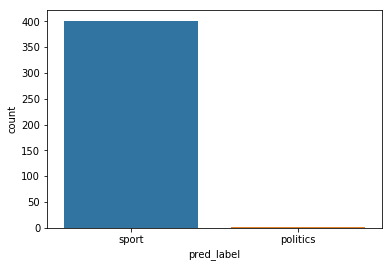

In [98]:
# df = kmn_df.sort_values(by=['label'])['label']

# df = y_train.replace(ivd)
# df[df == 'tech']

df = y_pred_kmn[y_pred_kmn['label'] == 'sport']
sns.countplot(df['pred_label'])

In [ ]:
g = sns.FacetGrid(kmn_df, col="label",sharex=True)
g.map(sns.countplot, 'label')

In [86]:
(kmn_df[kmn_df['label'] == 'tech'].index)+1

Int64Index([2000, 2211, 2015, 2120, 2130, 1914, 2086, 1868, 1998, 1908,
            ...
            1862, 1827, 2092, 2024, 1983, 2197, 2225, 1865, 2160, 2167],
           dtype='int64', length=319)